In [1]:
!pip install -U gdown

In [2]:
!gdown "1QV5MTItAxjSL-qeZ3dsDrWizSEP2An1J"

Downloading...
From: https://drive.google.com/uc?id=1QV5MTItAxjSL-qeZ3dsDrWizSEP2An1J
To: /content/risk.csv
100% 7.09M/7.09M [00:00<00:00, 71.1MB/s]


In [3]:
!pip install matplotlib==3.2.1

In [4]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [5]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install git+https://github.com/Turbo87/utm.git
import utm
import folium

  Cloning https://github.com/Turbo87/utm.git to /tmp/pip-req-build-k87cbk02
  Running command git clone --filter=blob:none --quiet https://github.com/Turbo87/utm.git /tmp/pip-req-build-k87cbk02
  Resolved https://github.com/Turbo87/utm.git to commit f65017ece912afb7e0ce308f92f02d6d657593ae
  Preparing metadata (setup.py) ... done


# จังหวัดที่เสี่ยงที่จะเกิดเเผ่นดินถล่ม

In [75]:
risk = ('/content/risk.csv')
df1 = pd.read_csv(risk)
df1.groupby(by = 'PROVINCE').LOCATION.describe()
df1.drop_duplicates()
df1.replace(to_replace='', value='ไม่ระบุ', inplace=True)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35873 entries, 0 to 35872
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FID       35873 non-null  int64 
 1   OBJECTID  35873 non-null  int64 
 2   PLACE_ID  35873 non-null  int64 
 3   UTM_E     35873 non-null  int64 
 4   UTM_N     35873 non-null  int64 
 5   ZONE      35873 non-null  int64 
 6   TYPE      35873 non-null  object
 7   LOCATION  35873 non-null  object
 8   MOO       35873 non-null  object
 9   VILLAGE   35873 non-null  object
 10  TAMBON    35873 non-null  object
 11  DISTRICT  35873 non-null  object
 12  PROVINCE  35873 non-null  object
 13  REMARK    35873 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.8+ MB


In [118]:
df1['PROVINCE'] = df1['PROVINCE'].apply(lambda x: 'ไม่มีข้อมูล' if pd.isna(x) or x == '' or str(x).isspace() else x)

In [119]:
q1 = {'จำนวณ':df1.PROVINCE.value_counts()}
print("จังหวัดที่เกิดเเผ่นดินถล่มมากที่สุด : ",df1.PROVINCE.value_counts().idxmax())
print("จังหวัดที่เกิดเเผ่นดินถล่มน้อยที่สุด : ",df1.PROVINCE.value_counts().idxmin())
q = pd.DataFrame(q1)
q

จังหวัดที่เกิดเเผ่นดินถล่มมากที่สุด :  ลำปาง
จังหวัดที่เกิดเเผ่นดินถล่มน้อยที่สุด :  สุราษฎร์ธานี


จำนวณ
ลำปาง             4438
สระบุรี           3048
ชัยภูมิ           2986
กาญจนบุรี         2676
เลย               2508
ประจวบคีรีขันธ์   1856
เพชรบูรณ์         1758
ระนอง             1406
เพชรบุรี          1036
ชลบุรี            1016
กำแพงเพชร          976
นครศรีธรรมราช      913
พิษณุโลก           881
นครราชสีมา         855
พังงา              814
ภูเก็ต             746
ขอนแก่น            596
ลพบุรี             586
สระแก้ว            566
ราชบุรี            558
ฉะเชิงเทรา         530
นครนายก            528
อุดรธานี           492
นครสวรรค์          492
ระยอง              465
อุทัยธานี          376
หนองคาย            344
สงขลา              310
ตราด               238
สุพรรณบุรี         204
พะเยา              202
แพร่               186
ตาก                182
เชียงราย           178
ชุมพร              166
ไม่มีข้อมูล        162
เชียงใหม่          144
ลำพูน              117
จันทบุรี           116
กระบี่             108
ปราจีนบุรี          60
หนองบัวลำภู         26
พิจิตร              20
สุราษฎร์ธานี         8

จังหวัดที่เกิดเเผ่นดินถล่มมากที่สุด

In [120]:
x = df1.PROVINCE.value_counts().idxmax()
df1.loc[df1['PROVINCE'] == x][['UTM_E','UTM_N','ZONE','TYPE','LOCATION','PROVINCE']]

UTM_E    UTM_N  ZONE           TYPE  \
2256   552165  1997833    47     วัดมีโบสถ์   
2257   552688  1997795    47     วัดมีโบสถ์   
2258   552257  1997486    47       โรงเรียน   
2259   552303  1997400    47    สถานีอนามัย   
2260   552633  1996662    47       โรงเรียน   
...       ...      ...   ...            ...   
24965  572562  2020349    47  วัดไม่มีโบสถ์   
24966  569086  2020306    47       โรงเรียน   
24967  572605  2020301    47       โรงเรียน   
24968  568866  2019969    47  วัดไม่มีโบสถ์   
24969  574439  2019142    47     วัดมีโบสถ์   

                                 LOCATION PROVINCE  
2256                          วัดบอมหลวงง    ลำปาง  
2257                           วัดบอมธาตุ    ลำปาง  
2258                      โรงเรียนบ้านบอม    ลำปาง  
2259                   สถานีอนามัยบ้านออม    ลำปาง  
2260              โรงเรียนแม่ทะพีฒนาศึกษา    ลำปาง  
...                                   ...      ...  
24965                        วัดบ้านปงชัย    ลำปาง  
24966  วิทยาลัยสารพัดช่างลำปางสาขาแม่เมาะ    ลำปาง  
24967                   โรงเรียนบ้านปงชัย    ลำปาง  
24968                            วัดนาแขม    ลำปาง  
24969                   วัดคีรีไชยแม่เมาะ    ลำปาง  

[4438 rows x 6 columns]

จังหวัดที่เกิดเเผ่นดินถล่มน้อยที่สุด

In [121]:
x2 = df1.PROVINCE.value_counts().idxmin()
df1.loc[df1['PROVINCE'] == x2][['UTM_E','UTM_N','ZONE','TYPE','LOCATION','PROVINCE']]

UTM_E   UTM_N  ZONE           TYPE               LOCATION  \
10766  454564  985131    47    สถานีอนามัย  สถานีอนามัยตำบลคลองศก   
10767  447817  983879    47  วัดไม่มีโบสถ์       วัดถ้ำพันธุรัตน์   
10768  453855  984798    47       โรงเรียน  โรงเรียนบ้านหญ้าปล้อง   
10769  448831  982998    47       โรงเรียน     โรงเรียนบ้านบางปรุ   
30632  454564  985131    47    สถานีอนามัย  สถานีอนามัยตำบลคลองศก   
30633  447817  983879    47  วัดไม่มีโบสถ์       วัดถ้ำพันธุรัตน์   
30634  453855  984798    47       โรงเรียน  โรงเรียนบ้านหญ้าปล้อง   
30635  448831  982998    47       โรงเรียน     โรงเรียนบ้านบางปรุ   

           PROVINCE  
10766  สุราษฎร์ธานี  
10767  สุราษฎร์ธานี  
10768  สุราษฎร์ธานี  
10769  สุราษฎร์ธานี  
30632  สุราษฎร์ธานี  
30633  สุราษฎร์ธานี  
30634  สุราษฎร์ธานี  
30635  สุราษฎร์ธานี

เปอร์เซ็นต์ที่เกิดขึ้นในจังหวัด (PROVINCE)

In [122]:
Px = df1['PROVINCE'].value_counts().values.tolist()
Pxx = df1['PROVINCE'].value_counts().index.tolist()
Py = df1['PROVINCE'].count()
Pz = {'Percentage':(Px/Py*100)}
Pzz = pd.DataFrame(Pz,Pxx)
Pzz

Percentage
ลำปาง             12.371421
สระบุรี            8.496641
ชัยภูมิ            8.323809
กาญจนบุรี          7.459649
เลย                6.991331
ประจวบคีรีขันธ์    5.173808
เพชรบูรณ์          4.900622
ระนอง              3.919382
เพชรบุรี           2.887966
ชลบุรี             2.832214
กำแพงเพชร          2.720709
นครศรีธรรมราช      2.545090
พิษณุโลก           2.455886
นครราชสีมา         2.383408
พังงา              2.269116
ภูเก็ต             2.079558
ขอนแก่น            1.661417
ลพบุรี             1.633541
สระแก้ว            1.577788
ราชบุรี            1.555487
ฉะเชิงเทรา         1.477434
นครนายก            1.471859
อุดรธานี           1.371505
นครสวรรค์          1.371505
ระยอง              1.296240
อุทัยธานี          1.048142
หนองคาย            0.958938
สงขลา              0.864160
ตราด               0.663452
สุพรรณบุรี         0.568673
พะเยา              0.563098
แพร่               0.518496
ตาก                0.507345
เชียงราย           0.496195
ชุมพร              0.462744
ไม่มีข้อมูล        0.451593
เชียงใหม่          0.401416
ลำพูน              0.326151
จันทบุรี           0.323363
กระบี่             0.301062
ปราจีนบุรี         0.167257
หนองบัวลำภู        0.072478
พิจิตร             0.055752
สุราษฎร์ธานี       0.022301

กราฟเเสดงจังหวัดเกิดเเผ่นดินถล่ม (PROVINCE)

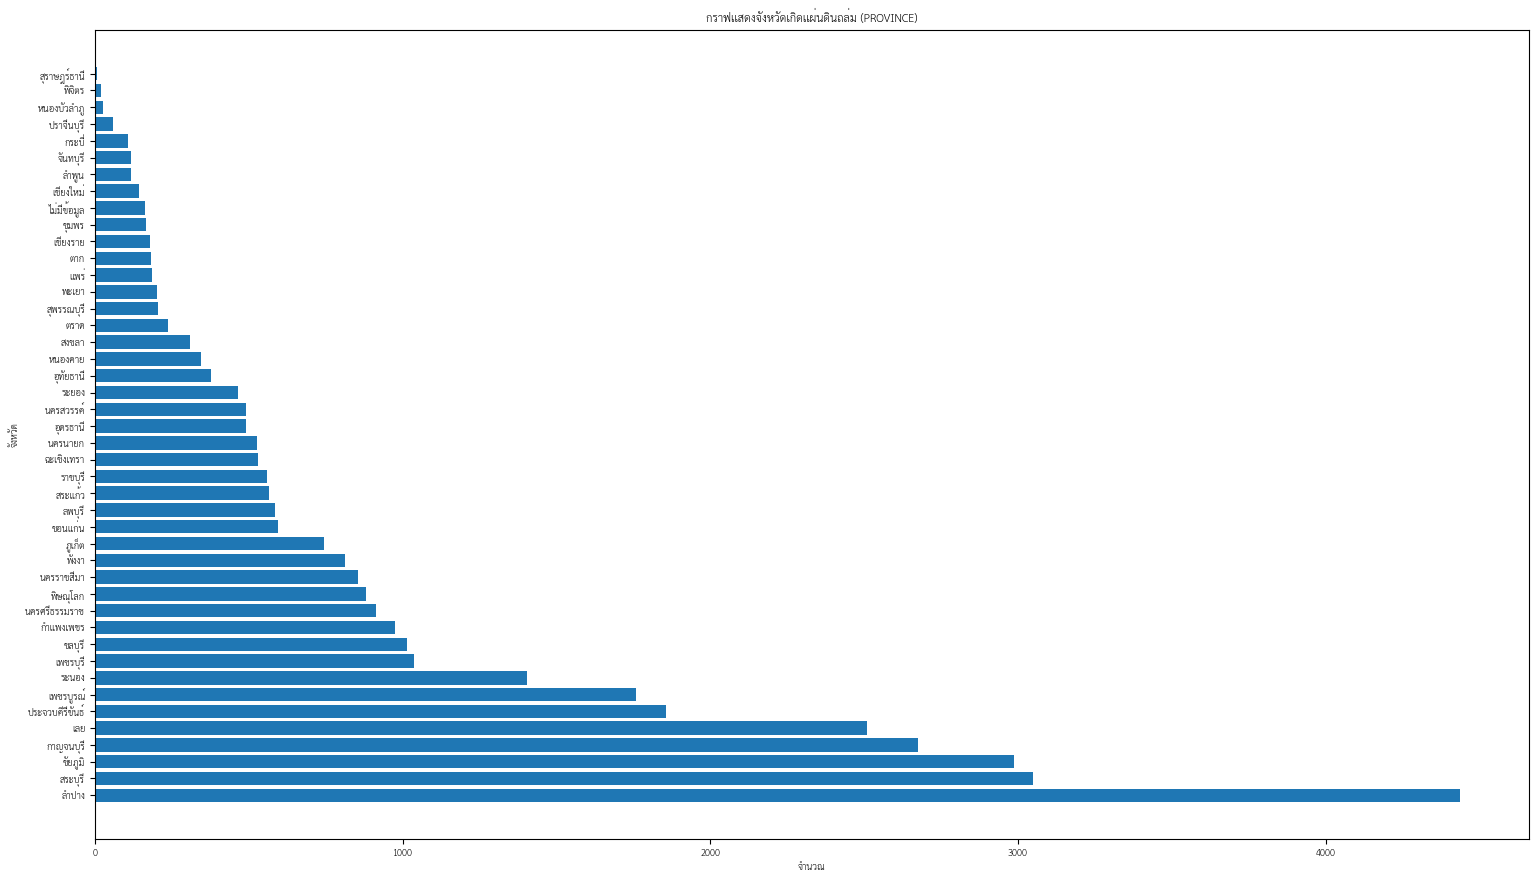

In [123]:
plt.figure(figsize=(18.5, 10.5))
plt.barh(Pxx,Px)
plt.title('กราฟเเสดงจังหวัดเกิดเเผ่นดินถล่ม (PROVINCE)')
plt.ylabel('จังหวัด')
plt.xlabel('จำนวณ')
plt.show()

# สถานที่เสี่ยงที่จะเกิดเเผ่นดินถล่ม

In [125]:
df1['LOCATION'] = df1['LOCATION'].apply(lambda x: 'ไม่มีข้อมูล' if pd.isna(x) or x == '' or str(x).isspace() else x)

In [126]:
q2 = {'จำนวณ':df1.LOCATION.value_counts()}
print("สถานที่เกิดเเผ่นดินถล่มมากที่สุด : ",df1.LOCATION.value_counts().idxmax())
print("สถานที่เกิดเเผ่นดินถล่มน้อยที่สุด : ",df1.LOCATION.value_counts().idxmin())
qq = pd.DataFrame(q2)
qq

สถานที่เกิดเเผ่นดินถล่มมากที่สุด :  ไม่มีข้อมูล
สถานที่เกิดเเผ่นดินถล่มน้อยที่สุด :  ศาลาหมู่บ้าน ม.8


จำนวณ
ไม่มีข้อมูล                    1961
ศาลาหมู่บ้าน                    167
วัดสามัคคีธรรม                   70
วัดศรีบุญเรือง                   54
วัดสว่างอารมณ์                   47
...                             ...
รพ.สต. บ้านทานพอ                  1
ศาลาประจำหมู่บ้าน หมู่ที่ 12      1
ศาลาประจำหมู่บ้าน ม.1             1
วิทยาลัยเทคนิคทุ่งสง              1
โรงเรียนบ้านมาบช้างนอน            1

[8563 rows x 1 columns]

สถานที่เกิดเเผ่นดินถล่มมากที่สุด

In [127]:
y = df1.LOCATION.value_counts().idxmax()
df1.loc[df1['LOCATION'] == y][['UTM_E','UTM_N','ZONE','TYPE','LOCATION','PROVINCE']]

UTM_E    UTM_N  ZONE          TYPE     LOCATION     PROVINCE
19     481431  1163200    47   โบสถ์คริสต์  ไม่มีข้อมูล        ระนอง
302    469908  1114107    47      โรงเรียน  ไม่มีข้อมูล        ระนอง
311    469908  1114107    47      โรงเรียน  ไม่มีข้อมูล        ระนอง
317    469908  1114107    47      โรงเรียน  ไม่มีข้อมูล        ระนอง
326    469908  1114107    47      โรงเรียน  ไม่มีข้อมูล        ระนอง
...       ...      ...   ...           ...          ...          ...
35755  855212  1397138    47  ศาลาหมู่บ้าน  ไม่มีข้อมูล  ไม่มีข้อมูล
35815  855044  1388227    47       ศาลเจ้า  ไม่มีข้อมูล  ไม่มีข้อมูล
35816  856042  1389203    47  ศาลาหมู่บ้าน  ไม่มีข้อมูล  ไม่มีข้อมูล
35817  856770  1389065    47  ศาลาหมู่บ้าน  ไม่มีข้อมูล  ไม่มีข้อมูล
35818  855411  1387508    47   วัดกลางเก่า  ไม่มีข้อมูล  ไม่มีข้อมูล

[1961 rows x 6 columns]

สถานที่เกิดเเผ่นดินถล่มน้อยที่สุด

In [128]:
y2 = df1.LOCATION.value_counts().idxmin()
df1.loc[df1['LOCATION'] == y2][['UTM_E','UTM_N','ZONE','TYPE','LOCATION','PROVINCE']]

UTM_E   UTM_N  ZONE                TYPE          LOCATION  \
16207  567582  905084    47  จุดปลอดภัยชั่วคราว  ศาลาหมู่บ้าน ม.8   

            PROVINCE  
16207  นครศรีธรรมราช

เปอร์เซ็นต์ที่เกิดขึ้นในสถานที่เกิดเเผ่นดินถล่ม (LOCATION)

In [129]:
Lx = df1['LOCATION'].value_counts().values.tolist()
Lxx = df1['LOCATION'].value_counts().index.tolist()
Ly = df1['LOCATION'].count()
Lz = {'Percentage':(Lx/Ly*100)}
Lzz = pd.DataFrame(Lz,Lxx)
Lzz

Percentage
ไม่มีข้อมูล                     5.466507
ศาลาหมู่บ้าน                    0.465531
วัดสามัคคีธรรม                  0.195133
วัดศรีบุญเรือง                  0.150531
วัดสว่างอารมณ์                  0.131018
...                                  ...
รพ.สต. บ้านทานพอ                0.002788
ศาลาประจำหมู่บ้าน หมู่ที่ 12    0.002788
ศาลาประจำหมู่บ้าน ม.1           0.002788
วิทยาลัยเทคนิคทุ่งสง            0.002788
โรงเรียนบ้านมาบช้างนอน          0.002788

[8563 rows x 1 columns]

กราฟเเสดงสถานที่เกิดเเผ่นดินถล่ม (LOCATION)

In [ ]:
plt.figure(figsize=(18.5, 10.5))
plt.barh(Lxx,Lx)
plt.title('กราฟเเสดงสถานที่เกิดเเผ่นดินถล่ม (LOCATION)')
plt.ylabel('สถานที่')
plt.xlabel('จำนวณ')
plt.show()

สถานที่เเบบไหนที่จะเกิดเเผ่นดินถล่ม

In [130]:
q3 = {'จำนวณ':df1.TYPE.value_counts()}
print("สถานที่เเบบไหนที่จะเกิดเเผ่นดินถล่มมากที่สุด : ",df1.TYPE.value_counts().idxmax())
print("สถานที่เเบบไหนที่จะเกิดเกิดเเผ่นดินถล่มน้อยที่สุด : ",df1.TYPE.value_counts().idxmin())
qqq = pd.DataFrame(q3)
qqq

สถานที่เเบบไหนที่จะเกิดเเผ่นดินถล่มมากที่สุด :  โรงเรียน
สถานที่เเบบไหนที่จะเกิดเกิดเเผ่นดินถล่มน้อยที่สุด :  สถานี


จำนวณ
โรงเรียน                             12877
วัดไม่มีโบสถ์                         7708
วัดมีโบสถ์                            4758
สถานีอนามัย                           2935
สำนักสงฆ์                             2862
วัด                                   1253
โรงพยาบาล                              614
สุสาน                                  416
มัสยิด                                 387
ศาลเจ้า                                354
ที่ว่าการอำเภอหร                       311
ศาลาหมู่บ้าน                           310
เจดีย์หรือสถูป                         238
โบสถ์คริสต์                            214
จุดปลอดภัยชั่วคราว                     131
สถานีตำรวจ                             128
อบต./ทต.                                56
ศาสนสถาน                                46
อบต.                                    42
เทศบาล                                  21
อบต./ทศ.                                21
สถานที่ปลอดภัย                          21
พื้นที่ปลอดภัย                          20
ศาลากลางจังหวัด                         20
ศาลาอเนกประสงค์                         15
อบต                                     14
อุทยาน                                  10
จุดเฝ้าระวัง                             9
โรงรียน                                  9
โรงพยาบาลชุมชน                           6
ทต.                                      6
อบต. /ทศ.                                6
ที่ว่าการอำเภอ                           4
อนามัย                                   4
น้ำตก                                    4
หน่วยพิทักษ์อุทยาน                       4
ที่ทำการเทศบาล                           3
มูลนิธิ                                  3
สวนป่า                                   3
อบต./เทศบาล                              3
สถานทีตำรวจ                              3
คริตสจักร                                3
รพ.                                      3
อุทยานแห่งชาติ                           3
หน่วยป้องกันรักษษป่าที่ รย.1             3
สถานีควบคุมไฟป่า                         2
น้ำตกมะกอก                               2
สถานี                                    1
โรงเรียนวัดคงคาวนาราม                    1
หน่วยพิทักษ์อุทยานที่4(น้ำตกมะกอก)       1
สถานนีตำรวจ                              1
หน่วยพิทักษ์อุทยานฯ น้ำตกพริ้วที่ 1      1
วัดกลางเก่า                              1
สำนักปฏิบัตืธรรม                         1
อบ                                       1

เปอร์เซ็นต์ที่เกิดขึ้นในสถานที่เเบบไหน(TYPE) ที่จะเกิดเกิดเเผ่นดินถล่ม

In [131]:
Tx = df1['TYPE'].value_counts().values.tolist()
Txx = df1['TYPE'].value_counts().index.tolist()
Ty = df1['TYPE'].count()
Tz = {'Percentage':(Tx/Ty*100)}
Tzz = pd.DataFrame(Tz,Txx)
Tzz

Percentage
โรงเรียน                              35.896078
วัดไม่มีโบสถ์                         21.486912
วัดมีโบสถ์                            13.263457
สถานีอนามัย                            8.181641
สำนักสงฆ์                              7.978145
วัด                                    3.492878
โรงพยาบาล                              1.711594
สุสาน                                  1.159647
มัสยิด                                 1.078806
ศาลเจ้า                                0.986815
ที่ว่าการอำเภอหร                       0.866947
ศาลาหมู่บ้าน                           0.864160
เจดีย์หรือสถูป                         0.663452
โบสถ์คริสต์                            0.596549
จุดปลอดภัยชั่วคราว                     0.365177
สถานีตำรวจ                             0.356814
อบต./ทต.                               0.156106
ศาสนสถาน                               0.128230
อบต.                                   0.117080
เทศบาล                                 0.058540
อบต./ทศ.                               0.058540
สถานที่ปลอดภัย                         0.058540
พื้นที่ปลอดภัย                         0.055752
ศาลากลางจังหวัด                        0.055752
ศาลาอเนกประสงค์                        0.041814
อบต                                    0.039027
อุทยาน                                 0.027876
จุดเฝ้าระวัง                           0.025089
โรงรียน                                0.025089
โรงพยาบาลชุมชน                         0.016726
ทต.                                    0.016726
อบต. /ทศ.                              0.016726
ที่ว่าการอำเภอ                         0.011150
อนามัย                                 0.011150
น้ำตก                                  0.011150
หน่วยพิทักษ์อุทยาน                     0.011150
ที่ทำการเทศบาล                         0.008363
มูลนิธิ                                0.008363
สวนป่า                                 0.008363
อบต./เทศบาล                            0.008363
สถานทีตำรวจ                            0.008363
คริตสจักร                              0.008363
รพ.                                    0.008363
อุทยานแห่งชาติ                         0.008363
หน่วยป้องกันรักษษป่าที่ รย.1           0.008363
สถานีควบคุมไฟป่า                       0.005575
น้ำตกมะกอก                             0.005575
สถานี                                  0.002788
โรงเรียนวัดคงคาวนาราม                  0.002788
หน่วยพิทักษ์อุทยานที่4(น้ำตกมะกอก)     0.002788
สถานนีตำรวจ                            0.002788
หน่วยพิทักษ์อุทยานฯ น้ำตกพริ้วที่ 1    0.002788
วัดกลางเก่า                            0.002788
สำนักปฏิบัตืธรรม                       0.002788
อบ                                     0.002788

กราฟเเสดงสถานที่เเบบไหน(TYPE) ที่เกิดเเผ่นดินถล่ม

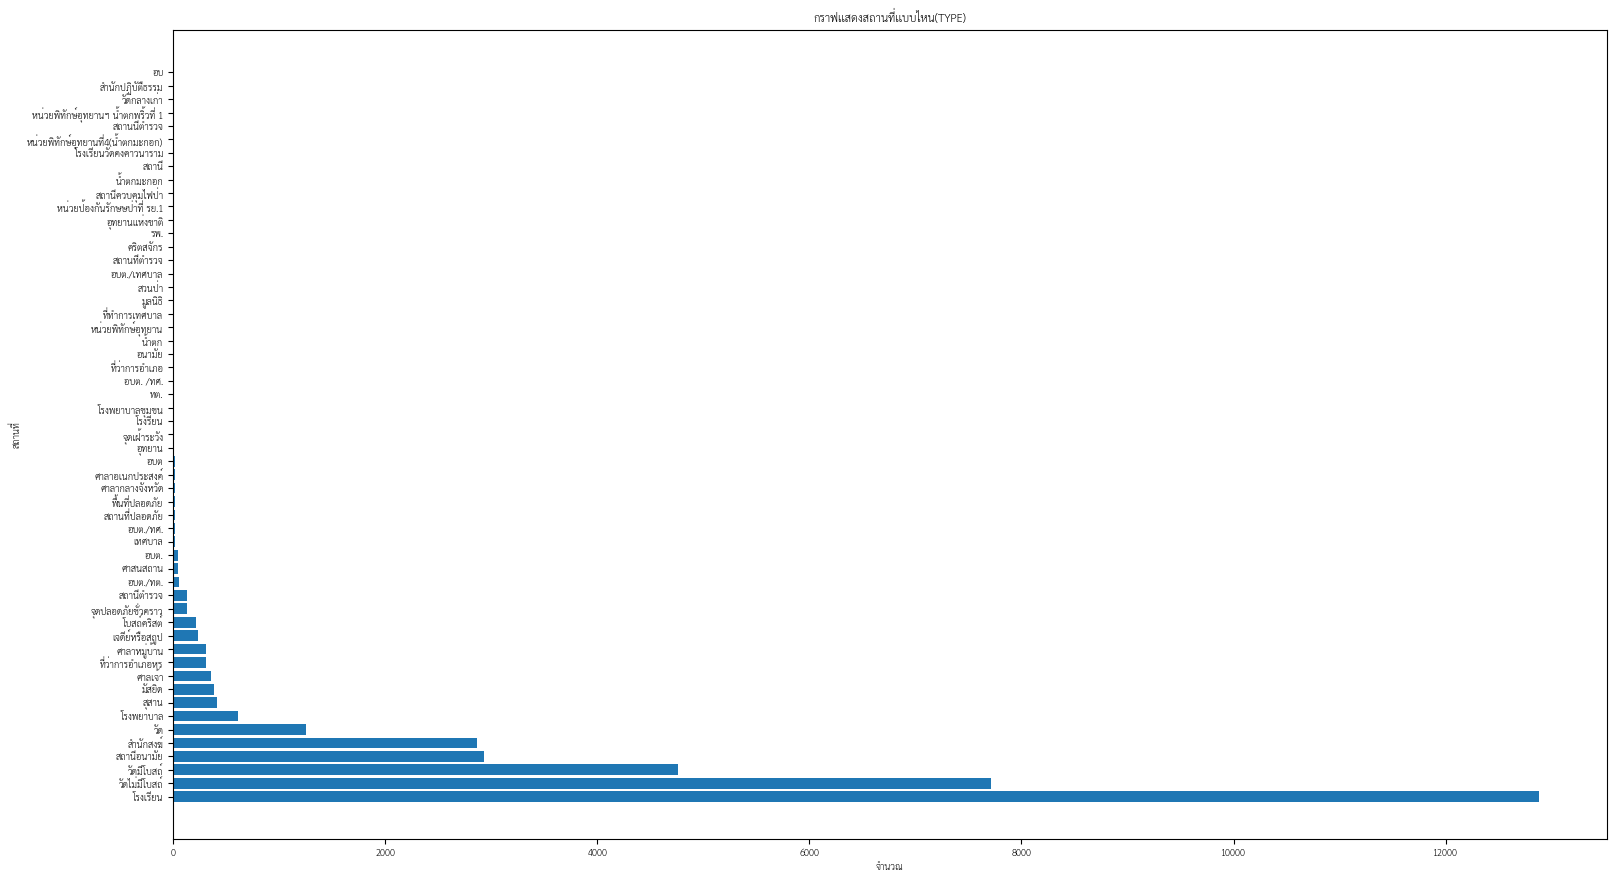

In [132]:
plt.figure(figsize=(18.5, 10.5))
plt.barh(Txx,Tx)
plt.title('กราฟเเสดงสถานที่เเบบไหน(TYPE)')
plt.ylabel('สถานที่')
plt.xlabel('จำนวณ')
plt.show()

# สถานะของสถานที่

In [115]:
df1['REMARK'] = df1['REMARK'].apply(lambda x: 'ไม่มีชื่อ' if pd.isna(x) or x == '' or str(x).isspace() else x)

In [117]:
q4 = {'จำนวณ':df1.REMARK.value_counts()}
qqqq = pd.DataFrame(q4)
qqqq

จำนวณ
ไม่มีชื่อ                35584
จุดปลอดภัยชั่วคราว         212
เพิ่มpoint                  54
จุดปลอยภัยชั่วคราว           9
เพิ่มpoint ไม่ต้องเพิ่ม      6
เพิ่มชื่อ                    4
จุดเฝ้าระวัง                 3
พื้นที่ปลอดภัย               1

In [109]:
z = input("ใส่สถานะของสถานที่ : ")
df1.loc[df1['REMARK'] == z][['UTM_E','UTM_N','ZONE','TYPE','LOCATION','PROVINCE','REMARK']]

ใส่สถานะของสถานที่ : ไม่มีชื่อ


UTM_E    UTM_N  ZONE            TYPE     LOCATION   PROVINCE  \
19     481431  1163200    47     โบสถ์คริสต์  ไม่มีข้อมูล      ระนอง   
302    469908  1114107    47        โรงเรียน  ไม่มีข้อมูล      ระนอง   
311    469908  1114107    47        โรงเรียน  ไม่มีข้อมูล      ระนอง   
317    469908  1114107    47        โรงเรียน  ไม่มีข้อมูล      ระนอง   
326    469908  1114107    47        โรงเรียน  ไม่มีข้อมูล      ระนอง   
...       ...      ...   ...             ...          ...        ...   
15817  421689   918462    47           สุสาน  ไม่มีข้อมูล      พังงา   
15926  422957   915286    47           สุสาน  ไม่มีข้อมูล      พังงา   
17514  464340  1619837    47  เจดีย์หรือสถูป  ไม่มีข้อมูล  กาญจนบุรี   
17553  418968  1652545    47       โรงพยาบาล  ไม่มีข้อมูล  กาญจนบุรี   
17572  419037  1652390    47       สำนักสงฆ์  ไม่มีข้อมูล  กาญจนบุรี   

          REMARK  
19     ไม่มีชื่อ  
302    ไม่มีชื่อ  
311    ไม่มีชื่อ  
317    ไม่มีชื่อ  
326    ไม่มีชื่อ  
...          ...  
15817  ไม่มีชื่อ  
15926  ไม่มีชื่อ  
17514  ไม่มีชื่อ  
17553  ไม่มีชื่อ  
17572  ไม่มีชื่อ  

[325 rows x 7 columns]

# Map เเสดงพื้นที่เสี่ยง

In [ ]:
x = utm.to_latlon(df1.UTM_E,df1.UTM_N, 47, 'N')
w = pd.DataFrame(x)
a = []
b = []
c = []
for i in w:
  a.append(w[i])
  b.append(w[i][0])
  c.append(w[i][1])
z = pd.DataFrame(a)
z

In [ ]:
map=folium.Map(location=[16.439625,102.828728])
fg = folium.FeatureGroup(name="ThaiLand Map")
city = list(df1["LOCATION"])
lat = list(b)
lon = list(c)
for city,lat,lon in zip(city,lat,lon):
  fg.add_child(folium.Marker(location=[lat,lon],popup=city))
map.add_child(fg)
map.save("Areas at risk Thai.html")
#map

# ตัวอย่างเเผนที่เกิดภัยดินถล่มมากที่สุด 5 อับดับเเรก

# จังหวัด ลำปาง

In [133]:
x = df1.PROVINCE.value_counts().idxmax()
a =df1.loc[df1['PROVINCE'] == x]['UTM_E']
b =df1.loc[df1['PROVINCE'] == x]['UTM_N']
s = utm.to_latlon(a,b,47, 'N')
w = pd.DataFrame(s)
a = []
b = []
c = []
for i in w:
  a.append(w[i])
  b.append(w[i][0])
  c.append(w[i][1])
map=folium.Map(location=[18.234813294398144,99.48918342590332])
fg = folium.FeatureGroup(name="ThaiLand Map")
city = list(df1["LOCATION"])
lat = list(b)
lon = list(c)
for city,lat,lon in zip(city,lat,lon):
  fg.add_child(folium.Marker(location=[lat,lon],popup=city))
map.add_child(fg)
map

# จังหวัด สระบุรี

In [ ]:
a =df1.loc[df1['PROVINCE'] == 'สระบุรี']['UTM_E']
b =df1.loc[df1['PROVINCE'] == 'สระบุรี']['UTM_N']
s = utm.to_latlon(a,b,47, 'N')
w = pd.DataFrame(s)
a = []
b = []
c = []
for i in w:
  a.append(w[i])
  b.append(w[i][0])
  c.append(w[i][1])
map=folium.Map(location=[14.52861,100.91139])
fg = folium.FeatureGroup(name="ThaiLand Map")
city = list(df1["LOCATION"])
lat = list(b)
lon = list(c)
for city,lat,lon in zip(city,lat,lon):
  fg.add_child(folium.Marker(location=[lat,lon],popup=city))
map.add_child(fg)
map

# จังหวัด ชัยภูมิ

In [ ]:
a =df1.loc[df1['PROVINCE'] == 'ชัยภูมิ']['UTM_E']
b =df1.loc[df1['PROVINCE'] == 'ชัยภูมิ']['UTM_N']
s = utm.to_latlon(a,b,47, 'N')
w = pd.DataFrame(s)
a = []
b = []
c = []
for i in w:
  a.append(w[i])
  b.append(w[i][0])
  c.append(w[i][1])
map=folium.Map(location=[15.80556,102.03111])
fg = folium.FeatureGroup(name="ThaiLand Map")
city = list(df1["LOCATION"])
lat = list(b)
lon = list(c)
for city,lat,lon in zip(city,lat,lon):
  fg.add_child(folium.Marker(location=[lat,lon],popup=city))
map.add_child(fg)
map

# จังหวัด กาญจนบุรี


In [ ]:
a =df1.loc[df1['PROVINCE'] == 'กาญจนบุรี']['UTM_E']
b =df1.loc[df1['PROVINCE'] == 'กาญจนบุรี']['UTM_N']
s = utm.to_latlon(a,b,47, 'N')
w = pd.DataFrame(s)
a = []
b = []
c = []
for i in w:
  a.append(w[i])
  b.append(w[i][0])
  c.append(w[i][1])
map=folium.Map(location=[14.01944,99.53111])
fg = folium.FeatureGroup(name="ThaiLand Map")
city = list(df1["LOCATION"])
lat = list(b)
lon = list(c)
for city,lat,lon in zip(city,lat,lon):
  fg.add_child(folium.Marker(location=[lat,lon],popup=city))
map.add_child(fg)
map

# จังหวัด เลย

In [ ]:
a =df1.loc[df1['PROVINCE'] == 'เลย']['UTM_E']
b =df1.loc[df1['PROVINCE'] == 'เลย']['UTM_N']
s = utm.to_latlon(a,b,47, 'N')
w = pd.DataFrame(s)
a = []
b = []
c = []
for i in w:
  a.append(w[i])
  b.append(w[i][0])
  c.append(w[i][1])
map=folium.Map(location=[17.48528,101.73028])
fg = folium.FeatureGroup(name="ThaiLand Map")
city = list(df1["LOCATION"])
lat = list(b)
lon = list(c)
for city,lat,lon in zip(city,lat,lon):
  fg.add_child(folium.Marker(location=[lat,lon],popup=city))
map.add_child(fg)
map